# NLTK - natural language Processing Kit za Python
* Python alat za obradu teksta prirodnih jezika
* NLTK označavatelji (engl. taggers)

In [1]:
import nltk

In [9]:
# potrebni dodatni NLTK paketi, pokrenuti ćeliju ako bude trebalo
nltk.download('tagsets')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Domagoj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# Označivanje riječi (engl. tagging)
_part-of-speech tagging_ *(POS)* - označivanje riječi s njihovim vrstama  [U-Penn POS oznake](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
* liste riječi razložiti na dvojce `(riječ,vrsta_riječi)`
* vrste riječi imaju oznaku prema `PenTreebank` tablici
* NLTK nudi programe koji uče označavanja (engl. taggers) 
* NLTK korpusi sadrži označene korpuse




In [2]:
# POS oznake
#nltk.help.upenn_tagset()
# ili specificne?
#nltk.help.upenn_tagset('CC')
nltk.help.upenn_tagset('NN*')


NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [3]:

# testiranje
from nltk.tokenize import word_tokenize
text = word_tokenize('And now for something completely different')
nltk.pos_tag(text)
#nltk.help.upenn_tagset('RB')

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [4]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [5]:
# hrvatski jezik?
recenica = '''Ivan/NNP rado/ADV pliva/VB./'''
hr_token_tags = [nltk.tag.str2tuple(t) for t in recenica.split()]
print(hr_token_tags)

[('Ivan', 'NNP'), ('rado', 'ADV'), ('pliva/VB.', '')]


## Korištenje označenih korpusa.

In [6]:
# Brownov korpus
nltk.corpus.brown.tagged_words()[:5]
# conll2000 korpus
nltk.corpus.conll2000.tagged_words()[:5]
# treebank korpus s universal POS
#nltk.corpus.treebank.tagged_words(tagset='universal')[:5]

[('Confidence', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('pound', 'NN'),
 ('is', 'VBZ')]

Najučestalije oznake za EN jezik?

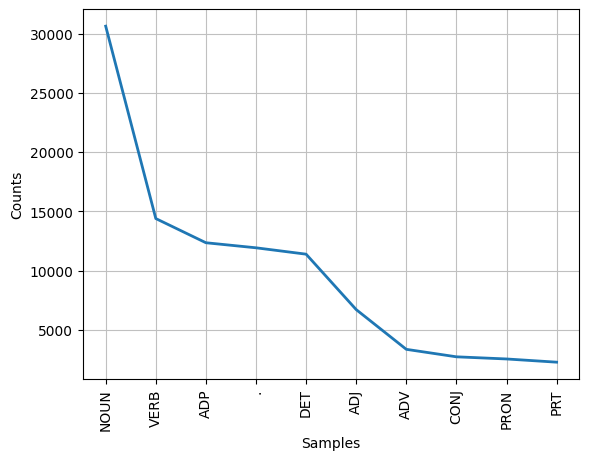

In [7]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)

fd = nltk.FreqDist(tag_fd)
fd.plot(10);

Ali uz malo dodatne NLTK dokumentacije i (slabo) dostupnih HR resursa ...

In [8]:
from nltk.corpus.reader.conll import ConllCorpusReader
sethr = ConllCorpusReader(
    'data/',
    'web.hr.conll',
    ('ignore','words','ignore','ignore','pos','tree')    
)

In [9]:
sethr.words()
sethr.tagged_words()

[('Čula', 'Vmp-pn'), ('su', 'Var3p'), ('se', 'Px--sa'), ...]

In [10]:
from nltk.corpus.reader.mte import MTETagConverter

set_hr_upos = [(word,MTETagConverter.msd_to_universal(tag)) for (word,tag) in sethr.tagged_words()]
set_hr_upos[:4]

[('Čula', 'VERB'), ('su', 'VERB'), ('se', 'PRON'), ('objašnjenja', 'NOUN')]

## Koje vrste riječi su u HR učestale?

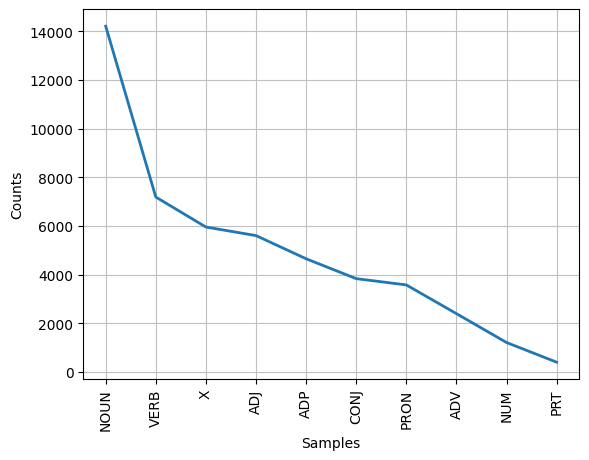

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
tag_fd = nltk.FreqDist(tag for (word, tag) in set_hr_upos)
tag_fd.plot(10)

Koje su najčešće riječi po razredima riječi?

In [12]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])


NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

In [13]:
tagdict = findtags('NOUN', set_hr_upos)
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NOUN [('godine', 93), ('vrijeme', 46), ('ljudi', 40), ('način', 39), ('godina', 39)]


## Izgradnja označavatelja

In [13]:
# skup za treniranje i testiranje

import nltk
import random

from nltk.corpus import brown
brown_sents = brown.sents(categories='news') # dohvati tekstove 'vijesti'
brown_tagged_sents = [sentence for sentence in nltk.corpus.brown.tagged_sents(categories='news',tagset='universal')]

# podjela 9 : 1
size = int(0.9 * len(brown_tagged_sents))

# permutiraj skup rečenica
random.shuffle(brown_tagged_sents)

train_sents = brown_tagged_sents[:size]
test_sents  = brown_tagged_sents[size:]



### Regex označavatelj

In [14]:


# označivanje na temelju regexa
patterns = [
    (r'.*ing$', 'VERB'), # gerunds
    (r'.*ed$', 'VERB'), # simple past
    (r'.*es$', 'VERB'), # 3rd singular present
    (r'.*ould$', 'VERB'), # modals
    (r'.*\'s$', 'NOUN'), # possessive nouns
    (r'.*s$', 'NOUN'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
   (r'.*', 'NOUN') # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)

test_sent = brown_sents[5]

tagged_sent = regexp_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)



print(f'Preciznost: {regexp_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 



It NOUN
recommended VERB
that NOUN
Fulton NOUN
legislators NOUN
act NOUN
`` NOUN
to NOUN
have NOUN
these NOUN
laws NOUN
studied VERB
and NOUN
revised VERB
to NOUN
the NOUN
end NOUN
of NOUN
modernizing VERB
and NOUN
improving VERB
them NOUN
'' NOUN
. NOUN
Preciznost: 0.35926564560300234


## N-gram označavatelji

### Unigram označavanje

In [15]:

# unigram označavatelj
unigram_tagger = nltk.UnigramTagger(train_sents,backoff=regexp_tagger)

# oznaci skup za treniranje
tagged_sent = unigram_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {unigram_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 

It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act NOUN
`` .
to PRT
have VERB
these DET
laws NOUN
studied VERB
and CONJ
revised VERB
to PRT
the DET
end NOUN
of ADP
modernizing VERB
and CONJ
improving VERB
them PRON
'' .
. .
Preciznost: 0.9404604929506035


Treniranje i testiranje modela.

In [16]:
# matrica zbunjenosti
test_tags = [tag for sent in brown.sents(categories='news')[:10] for (word, tag) in unigram_tagger.tag(sent)]

gold_tags = [tag for sent in brown.tagged_sents(categories='news',tagset='universal')[:10] for (word, tag) in sent]


cm = nltk.ConfusionMatrix(gold_tags, test_tags)
print(cm)


     |              C     N     P     V |
     |     A  A  A  O  D  O  N  R  P  E |
     |     D  D  D  N  E  U  U  O  R  R |
     |  .  J  P  V  J  T  N  M  N  T  B |
-----+----------------------------------+
   . |<38> .  .  .  .  .  .  .  .  .  . |
 ADJ |  .<17> .  .  .  .  2  .  .  .  . |
 ADP |  .  .<30> .  .  .  .  .  .  2  . |
 ADV |  .  1  . <5> .  .  .  .  .  .  . |
CONJ |  .  .  .  .<10> .  .  .  .  .  . |
 DET |  .  .  .  .  .<39> .  .  .  .  . |
NOUN |  .  .  .  .  .  .<81> .  .  .  . |
 NUM |  .  .  .  .  .  .  . <1> .  .  . |
PRON |  .  .  .  .  .  .  .  . <6> .  . |
 PRT |  .  .  .  .  .  .  .  .  . <3> . |
VERB |  .  .  .  .  .  .  1  .  .  .<48>|
-----+----------------------------------+
(row = reference; col = test)



### N-gram označavanje

NLTK nudi mogućnost izgrađivanja HMM modela označavatelja.

In [17]:
# trenrianje bigramskog HMM
bigram_tagger = nltk.BigramTagger(train_sents) 


# oznaci skup za treniranje
tagged_sent = bigram_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {bigram_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 

It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act VERB
`` .
to PRT
have VERB
these DET
laws NOUN
studied VERB
and CONJ
revised VERB
to PRT
the DET
end NOUN
of ADP
modernizing VERB
and CONJ
improving VERB
them PRON
'' .
. .
Preciznost: 0.19099300131859215


In [18]:
# trenrianje bigramskog HMM
trigram_tagger = nltk.TrigramTagger(train_sents) 


# oznaci skup za treniranje
tagged_sent = trigram_tagger.tag(test_sent)

# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {trigram_tagger.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 

It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act VERB
`` .
to ADP
have None
these None
laws None
studied None
and None
revised None
to None
the None
end None
of None
modernizing None
and None
improving None
them None
'' None
. None
Preciznost: 0.09463434425398114


**Problem inherentne rijetkosti**: Uočavamo značajan pad u preciznosti 2,3-gramskom modelu u uspredbi s unigram modelom zbog rijetkom 2,3-grama u skupu za treniranje. 

Kako ovo rješiti?
  * zaglađivanje
  * povećavanje korpusa za  treniranje
  * kombinirati unigram, bigram i trigram model

### Kombinacija označavatelja

N-grami višeg reda imaju bolje *pokrivanje* (recall/coverage) nego *preciznost* (accuracy). Neka je dan skup podataka $x_i$ i razred $y_i\in\{0,1\}$ kojem pripadaju $\{x_1,y_i\}, \{x_2,y_2\},\ldots,\{x_n,y_n\}$. Neka je $f$ klasifikator podataka $x_i$ i neka je $$TP=|\{x_i:y_i = f(x_i) = 1\}|, FP=|\{x_i:f(x_i) = 1, y_i=0\}|, FN=|\{x_i:f(x_i) = 0, y_i=1\}|$$.

$$precision = \frac{TP}{TP+FP}, recall = \frac{TP}{TP+FN}$$

In [19]:
t0 = regexp_tagger # osnovni regexp parser
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents,backoff=t2)


# ispisi primjere
for tok, tag in tagged_sent:
    print(tok,tag)
    
print(f'Preciznost: {t3.accuracy(test_sents)}') # udio podudarajućih vlastitih oznaka sa standardnim 




It PRON
recommended VERB
that ADP
Fulton NOUN
legislators NOUN
act VERB
`` .
to ADP
have None
these None
laws None
studied None
and None
revised None
to None
the None
end None
of None
modernizing None
and None
improving None
them None
'' None
. None
Preciznost: 0.945532001217162


In [20]:
# matrica zbunjenosti
test_tags = [tag for sent in brown.sents(categories='news')[:10] for (word, tag) in t3.tag(sent)]
gold_tags = [tag for sent in brown.tagged_sents(categories='news',tagset='universal')[:10] for (word, tag) in sent]

cm = nltk.ConfusionMatrix(gold_tags, test_tags)
print(cm)

     |              C     N     P     V |
     |     A  A  A  O  D  O  N  R  P  E |
     |     D  D  D  N  E  U  U  O  R  R |
     |  .  J  P  V  J  T  N  M  N  T  B |
-----+----------------------------------+
   . |<38> .  .  .  .  .  .  .  .  .  . |
 ADJ |  .<18> .  .  .  .  1  .  .  .  . |
 ADP |  .  .<30> .  .  .  .  .  .  2  . |
 ADV |  .  .  . <6> .  .  .  .  .  .  . |
CONJ |  .  .  .  .<10> .  .  .  .  .  . |
 DET |  .  .  .  .  .<39> .  .  .  .  . |
NOUN |  .  .  .  .  .  .<81> .  .  .  . |
 NUM |  .  .  .  .  .  .  . <1> .  .  . |
PRON |  .  .  .  .  .  .  .  . <6> .  . |
 PRT |  .  .  1  .  .  .  .  .  . <2> . |
VERB |  .  .  .  .  .  .  .  .  .  .<49>|
-----+----------------------------------+
(row = reference; col = test)

